In [ ]:
# Import necessary libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define function to load images and labels
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):  # assuming images are in jpg or png format
            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))  # resize images for consistency
            images.append(img)
            labels.append(label)
    return images, labels

In [ ]:

# Load infected images
infected_folder = '/content/drive/MyDrive/PROJECT/PIT'
infected_images, infected_labels = load_images(infected_folder, 1)

# Load healthy images
healthy_folder = '/content/drive/MyDrive/PROJECT/PHT'
healthy_images, healthy_labels = load_images(healthy_folder, 0)

In [ ]:
# Concatenate infected and healthy images
X = np.concatenate((infected_images, healthy_images), axis=0)
y = np.concatenate((infected_labels, healthy_labels))
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Preprocessing: Standardize pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform([image.flatten() for image in X_train])
X_test_scaled = scaler.transform([image.flatten() for image in X_test])


In [ ]:
# Preprocessing: Standardize pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform([image.flatten() for image in X_train])
X_test_scaled = scaler.transform([image.flatten() for image in X_test])

# Define SVM classifier with grid search for hyperparameter optimization
pipeline = Pipeline([
    ('svm', SVC())
])

parameters = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('svm', SVC())]), n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']})

In [ ]:
# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


In [ ]:
# Predictions
y_pred = grid_search.predict(X_test_scaled)


In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)6
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9714285714285714
Precision: 1.0
Recall: 0.9444444444444444
F1 Score: 0.9714285714285714


In [ ]:
import matplotlib.pyplot as plt

# Display some sample predictions along with their corresponding images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Sample Predictions', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.axis('off')
    ax.set_title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

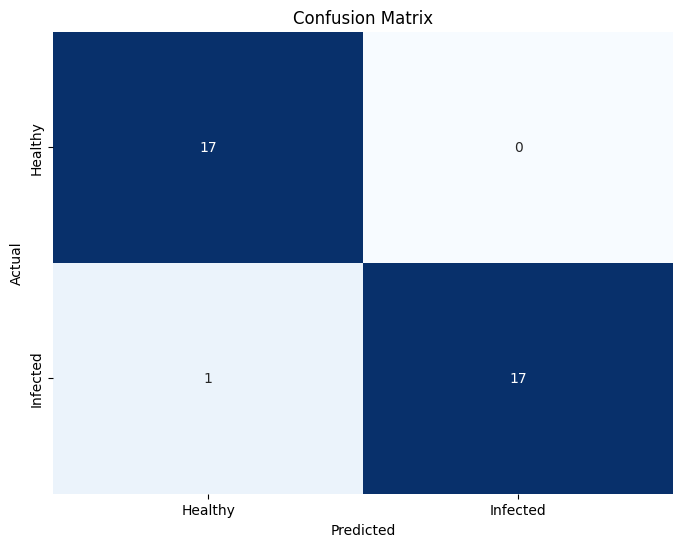

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Infected'], yticklabels=['Healthy', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


This confusion matrix provides insights into the performance of a classification model.

**True Positives (TP):** These are instances that were correctly predicted as “Healthy.” In this case, there are 17 true positives.

**False Negatives (FN):** These are instances that were actually “Healthy” but were incorrectly predicted as “Infected.” There is 0 false negative.

**False Positives (FP):** These are instances that were actually “Infected” but were incorrectly predicted as “Healthy.” There are 1 false positives.

**True Negatives (TN):** These are instances that were correctly predicted as “Infected.” In this case, there are 17 true negatives.
